In [1]:
import psycopg2
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import hist, show, xticks
import os
from config import pw

con = psycopg2.connect(
            host = "localhost",
            database = "Employee_SQL_Challenge_db",
            user = "postgres",
            password = pw,
            port = 5432)


In [2]:
# if needed - determine current working directory to locate saved chart images later
# cwd = os.getcwd()
# cwd

In [3]:
# create a psycopg2 cursor
cur =con.cursor()

# excute the psycopg2 query
cur.execute("select emp_no, last_name from employees")
rows = cur.fetchall()

# Read data from SQL database to create a dataframe for each table
employees_df = pd.read_sql("SELECT * FROM employees", con)
departments_df = pd.read_sql("SELECT * FROM departments", con)
dept_emp_df = pd.read_sql("SELECT * FROM dept_emp", con)
dept_manager_df = pd.read_sql("SELECT * FROM dept_manager", con)
salaries_df = pd.read_sql("SELECT * FROM salaries", con)
titles_df = pd.read_sql("SELECT * FROM titles", con)



In [4]:
# # Optional way to print each employee number and last name
# for r in rows:
#     data = pd.read_sql("SELECT * FROM Employees", con)
#     print(f" {r[0]}  {r[1]}")

In [5]:
'''print first 5 entries of each new DataFrame derived from each table'''
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [6]:
departments_df.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [7]:
dept_emp_df.head()

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [8]:
dept_manager_df.head()

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21


In [9]:
salaries_df.head()


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [10]:
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [11]:
# create merged dataframe using titles and salaries dataframes
combined_title_salary_df = pd.merge(titles_df, salaries_df, how='inner', on = "emp_no")
combined_title_salary_df.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [12]:
'''For Reference Only'''
# use .describe to view the min, max and distibution of salaries
combined_title_salary_df.describe(percentiles=[0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1])

,emp_no,salary
count,443308.000000,443308.000000
mean,253075.034430,53023.809615
std,161853.292613,14337.904140
min,10001.000000,40000.000000
0%,10001.000000,40000.000000
12.5%,47475.000000,40000.000000
25%,84855.750000,40000.000000
37.5%,212242.125000,42845.000000
50%,249847.500000,48746.000000
62.5%,287367.000000,54767.000000


In [13]:
'''use pd.cut function and assign 9 bins for histogram chart'''
bins1 = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]
pd.cut(combined_title_salary_df['salary'], bins=bins1)


0         (60000.0, 70000.0]
1         (60000.0, 70000.0]
2         (40000.0, 50000.0]
3         (40000.0, 50000.0]
4         (40000.0, 50000.0]
                 ...        
443303    (40000.0, 50000.0]
443304    (40000.0, 50000.0]
443305                   NaN
443306                   NaN
443307    (60000.0, 70000.0]
Name: salary, Length: 443308, dtype: category
Categories (9, interval[int64]): [(40000, 50000] < (50000, 60000] < (60000, 70000] < (70000, 80000] ... (90000, 100000] < (100000, 110000] < (110000, 120000] < (120000, 130000]]

In [14]:
''' View of BINS and COUNTS'''
# use value counts to see distribution of salaries across the 9 bins
pd.cut(combined_title_salary_df['salary'], bins=bins1, include_lowest=True).value_counts()

(39999.999, 50000.0]    233495
(50000.0, 60000.0]       85660
(60000.0, 70000.0]       61235
(70000.0, 80000.0]       36859
(80000.0, 90000.0]       17679
(90000.0, 100000.0]       6457
(100000.0, 110000.0]      1597
(110000.0, 120000.0]       289
(120000.0, 130000.0]        37
Name: salary, dtype: int64

In [15]:
'''Reference Only to view Min/Max Salary in data and count of Salaries'''
combined_title_salary_df['salary'].describe()

count    443308.000000
mean      53023.809615
std       14337.904140
min       40000.000000
25%       40000.000000
50%       48746.000000
75%       61843.000000
max      129492.000000
Name: salary, dtype: float64

In [16]:
'''Create dataframe with new column for "Salary Bins" '''

bin_labels = ['40-50k', '50-60k', '60-70k', '70-80k', '80-90k', '90-100k', '100-110k', '110-120k', '120-130k']
bins1 = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]

pd.cut(combined_title_salary_df['salary'], bins=bins1, labels=bin_labels)
combined_title_salary_df['salary_bin'] = pd.cut(combined_title_salary_df['salary'],\
                                                bins=bins1, labels=bin_labels, include_lowest=True)
combined_title_salary_df.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y,salary_bin
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26,60-70k
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03,60-70k
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02,40-50k
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01,40-50k
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01,40-50k


In [17]:
''' Reveiwing Salary Counts based on Salary Bin'''
sal_count = pd.DataFrame(combined_title_salary_df['salary_bin'].value_counts())
sal_count

,salary_bin
40-50k,233495
50-60k,85660
60-70k,61235
70-80k,36859
80-90k,17679
90-100k,6457
100-110k,1597
110-120k,289
120-130k,37


In [18]:
# line intentially left blank

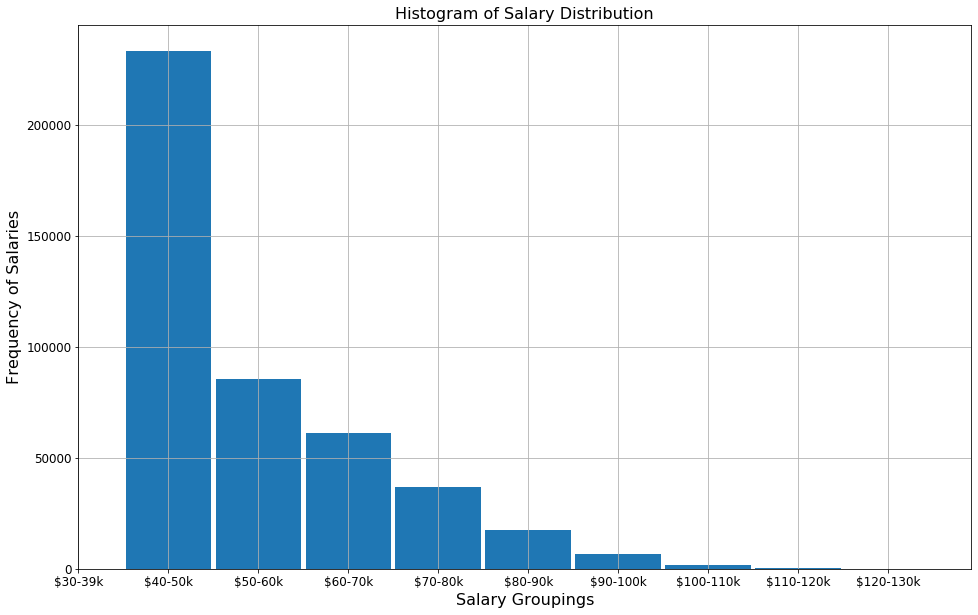

In [19]:
'''Used following line of code to stop Matplotlib pop-out windows from being created'''
# %matplotlib inline

''' Define Bin Labels for Histogram Chart below'''
bin_labels = ['$30-39k', '$40-50k', '$50-60k', '$60-70k', '$70-80k', '$80-90k', '$90-100k', '$100-110k', '$110-120k', '$120-130k']


hist_plot = combined_title_salary_df['salary'].hist(bins=bins1, align ="left", figsize=(16,10), ylabelsize=12, xlabelsize=12, rwidth=.95)

hist_plot.set_xticks(np.arange(30000, 130000, step=10000))
hist_plot.set_xticklabels(bin_labels)
hist_plot.set_title('Histogram of Salary Distribution', fontsize=16)
hist_plot.set_xlabel("Salary Groupings", fontsize=16)
hist_plot.set_ylabel("Frequency of Salaries", fontsize=16)
# fig.savefig("Histogram of Salary Distribution2.png")
plt.savefig("Histogram of Salary Distribution.png")
plt.show()



In [20]:
# line intentially left blank

In [21]:
# group the combined df by employee title and obtain average salary for each title
title_group = combined_title_salary_df.groupby('title')
mean_title = round(title_group['salary'].mean())
mean_title

title
Assistant Engineer    48493.0
Engineer              48540.0
Manager               51531.0
Senior Engineer       48507.0
Senior Staff          58503.0
Staff                 58465.0
Technique Leader      48581.0
Name: salary, dtype: float64

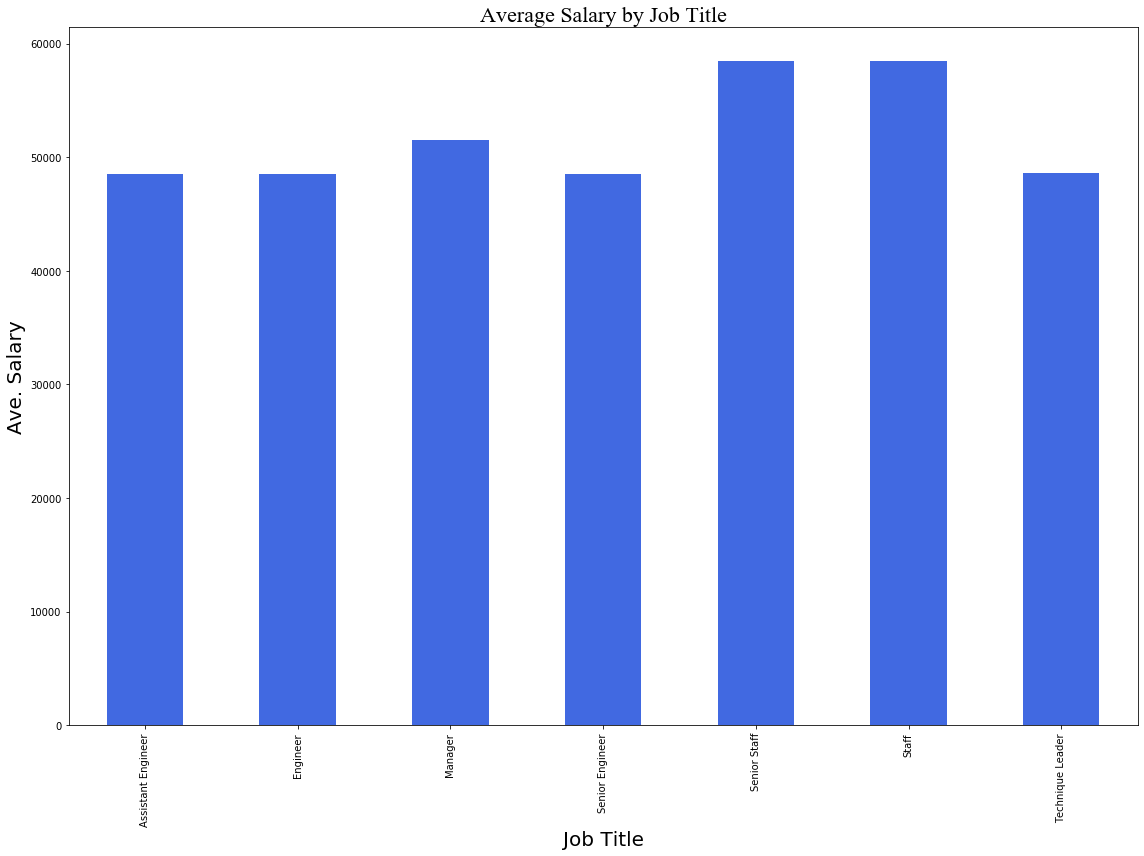

In [24]:
''' Plot a Bar Chart of the Average Salary by Job Title'''

mean_chart = mean_title.plot(kind='bar', color='royalblue')
# plt.bar(mean_title, users, color='royalblue'', alpha=0.5, align="center")

plt.rc('figure', figsize=(16, 12))
plt.title("Average Salary by Job Title",fontname="Times New Roman", fontsize=22, fontweight="bold")
mean_chart.set_xlabel("Job Title", fontsize=20)
mean_chart.set_ylabel("Ave. Salary", fontsize=20)
plt.tight_layout()
plt.savefig("Ave_Salary_by_Job_Title.png")
plt.show()

# Save the Figure for Average Salary by Job Title

In [25]:
salary_ck_df = salaries_df.set_index("emp_no")
salary_ck_df.head()
salary_ck_df.loc[[499942], : ]

,salary,from_date,to_date
emp_no,,,
499942,40000,1998-03-28,1999-03-28


In [26]:
# close the cursor
cur.close()


In [27]:
# close the connection
con.close()